In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#### Impor data 

data = pd.read_csv("./fifa21_train.csv")
pd.set_option('display.max_columns', None)
display(data.head(3))
print(data.shape)
data.info()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80


(11701, 101)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11701 entries, 0 to 11700
Columns: 101 entries, ID to OVA
dtypes: float64(10), int64(43), object(48)
memory usage: 9.0+ MB


In [2]:
def col_Value_Wage_Release_Clause_Value(df):
    
    df2 = df.copy()
    df2['Value'] = df2['Value'].map(lambda x: x.lstrip('€'))
    df2['Wage'] = df2['Wage'].map(lambda x: x.lstrip('€'))
    df2['Release Clause'] = df2['Release Clause'].map(lambda x: x.lstrip('€'))
    df2["Wage"] = df2["Wage"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
    df2["Release Clause"] = df2["Release Clause"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
    df2["Value"] = df2["Value"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
    df2["Hits"] = df2["Hits"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

    return df2

In [3]:
def clean_col_73_100(df):
    df2= df.copy()
    plus = df2.iloc[:,73:]
    plus = plus.drop(["OVA"], axis = 1)
    col_names = plus.columns
    def clean_plus(x):
        s = ""
        for char in x:
            if char == "+":
                break
            else:
                s = s + char 
        return int(s)
    for col in col_names:
        df2[col] = list(map(clean_plus, df2[col]))
    return df2

In [4]:
def clean_w_h(df):
    df2=df.copy()
    def clean2(x):
        s = ""
        for char in x:
            if char == "l":
                break
            s = s + char 
        return int(s)

    def clean(x):
        t = ""
        for char in x:
            if char == "'":
                char = "."
            elif char == "\"":
                break
            t = t + char 
        return float(t) 
    
    df2['Height'] = list(map(clean, df2['Height']))
    df2['Weight'] = list(map(clean2, df2['Weight']))
    return df2


clean_w_h(data)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,5.90,161,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",6.00,159,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,5.40,134,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,5.10,152,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,5.11,150,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,6.10,168,Left,5,"Feb 8, 2018",NaN,€625K,€3K,€891K,2018 ~ 2021,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,14,1589,347,3 ★,2★,Medium,Medium,1 ★,75,28,56,59,60,69,3,48+2,4

In [5]:
def clean_df(df):
    df2 = df.copy()  
    df2 = col_Value_Wage_Release_Clause_Value(df2) 
    df2 = clean_col_73_100(df2)
    df2 = clean_w_h(df2)
    df2.columns = list(map(lambda x: x.lower(), df2.columns))
    df2 = df2.drop(["loan date end"], axis = 1)
    df2 = df2.dropna()
    df2 = df2.drop_duplicates()

    return df2

In [6]:
data2 = clean_df(data)
data2

,id,name,age,nationality,club,bp,position,team & contract,height,weight,foot,growth,joined,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,5.90,161,Right,1,"Jul 1, 2015",525000,4000,801000,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58,58,58,61,62,62,62,61,63,63,63,63,63,63,63,63,59,59,59,59,59,58,54,54,54,58,15,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",6.00,159,Right,0,"Jan 16, 2015",8500000,23000,0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77,77,77,77,77,77,77,77,76,76,76,76,68,68,68,76,57,53,53,53,57,53,48,48,48,53,18,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,5.40,134,Right,0,"Jan 31, 2019",9000000,49000,15300000,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73,73,73,80,79,79,79,80,80,80,80,79,74,74,74,79,59,56,56,56,59,53,41,41,41,53,12,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,5.10,152,Right,13,"Jul 1, 2016",275000,4000,694000,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50,50,50,51,51,51,51,51,53,53,53,53,56,56,56,53,56,58,58,58,56,57,58,58,58,57,14,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,5.11,150,Right,8,"Jul 1, 2018",725000,2000,1400000,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56,56,56,59,59,59,59,59,61,61,61,62,63,63,63,62,64,64,64,64,64,63,61,61,61,63,15,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,196848,I. Ávila,29,Peru,Melgar FBC,ST,ST,Melgar FBC 2019 ~ 2021,5.70,154,Right,0,"Jul 1, 2019",550000,500,1200000,2019 ~ 2021,290,36,72,65,57,60.0,283,62,56.0,56,46,63,368,67,65,76.0,71,89.0,303,64,58.0,56,60,65,254,50,33.0,64.0,37.0,70,60.0,80,41,19,20.0,60,12,13,8,13,14,1638,337,3 ★,3★,High,Low,1 ★,66,68,47,66,33,57,4,65,65,65,61,63,63,63,61,60,60,60,58,53,53,53,58,46,45,45,45,46,44,43,43,43,44,19,65
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,6.10,168,Left,5,"Feb 8, 2018",625000,3000,891000,2018 ~ 2021,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0

In [30]:
display(data2)

,id,name,age,nationality,club,bp,position,team & contract,height,weight,foot,growth,joined,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,5.90,161,Right,1,"Jul 1, 2015",525000,4000,801000,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58,58,58,61,62,62,62,61,63,63,63,63,63,63,63,63,59,59,59,59,59,58,54,54,54,58,15,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",6.00,159,Right,0,"Jan 16, 2015",8500000,23000,0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77,77,77,77,77,77,77,77,76,76,76,76,68,68,68,76,57,53,53,53,57,53,48,48,48,53,18,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,5.40,134,Right,0,"Jan 31, 2019",9000000,49000,15300000,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73,73,73,80,79,79,79,80,80,80,80,79,74,74,74,79,59,56,56,56,59,53,41,41,41,53,12,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,5.10,152,Right,13,"Jul 1, 2016",275000,4000,694000,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50,50,50,51,51,51,51,51,53,53,53,53,56,56,56,53,56,58,58,58,56,57,58,58,58,57,14,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,5.11,150,Right,8,"Jul 1, 2018",725000,2000,1400000,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56,56,56,59,59,59,59,59,61,61,61,62,63,63,63,62,64,64,64,64,64,63,61,61,61,63,15,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,196848,I. Ávila,29,Peru,Melgar FBC,ST,ST,Melgar FBC 2019 ~ 2021,5.70,154,Right,0,"Jul 1, 2019",550000,500,1200000,2019 ~ 2021,290,36,72,65,57,60.0,283,62,56.0,56,46,63,368,67,65,76.0,71,89.0,303,64,58.0,56,60,65,254,50,33.0,64.0,37.0,70,60.0,80,41,19,20.0,60,12,13,8,13,14,1638,337,3 ★,3★,High,Low,1 ★,66,68,47,66,33,57,4,65,65,65,61,63,63,63,61,60,60,60,58,53,53,53,58,46,45,45,45,46,44,43,43,43,44,19,65
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,6.10,168,Left,5,"Feb 8, 2018",625000,3000,891000,2018 ~ 2021,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0

In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11211 entries, 0 to 11700
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                11211 non-null  int64  
 1   name              11211 non-null  object 
 2   age               11211 non-null  int64  
 3   nationality       11211 non-null  object 
 4   club              11211 non-null  object 
 5   bp                11211 non-null  object 
 6   position          11211 non-null  object 
 7   team & contract   11211 non-null  object 
 8   height            11211 non-null  float64
 9   weight            11211 non-null  int64  
 10  foot              11211 non-null  object 
 11  growth            11211 non-null  int64  
 12  joined            11211 non-null  object 
 13  value             11211 non-null  int64  
 14  wage              11211 non-null  int64  
 15  release clause    11211 non-null  int64  
 16  contract          11211 non-null  objec

In [9]:
data2.isna().sum()

id             0
name           0
age            0
nationality    0
club           0
              ..
cb             0
rcb            0
rb             0
gk             0
ova            0
Length: 100, dtype: int64

,name,nationality,club,bp,position,team & contract,foot,joined,contract,w/f,sm,a/w,d/w,ir
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,Right,"Jul 1, 2015",2015 ~ 2020,4 ★,2★,High,Medium,1 ★
1,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",Right,"Jan 16, 2015","Dec 31, 2020 On Loan",3 ★,4★,High,Low,2 ★
2,S. Giovinco,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,Right,"Jan 31, 2019",2019 ~ 2022,4 ★,4★,High,Medium,2 ★
3,J. Evans,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,Right,"Jul 1, 2016",2016 ~ 2021,2 ★,2★,Medium,Medium,1 ★
4,Y. Demoncy,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,Right,"Jul 1, 2018",2018 ~ 2021,2 ★,3★,Low,Medium,1 ★


,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
11696,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
11697,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
11698,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


(11211, 15)


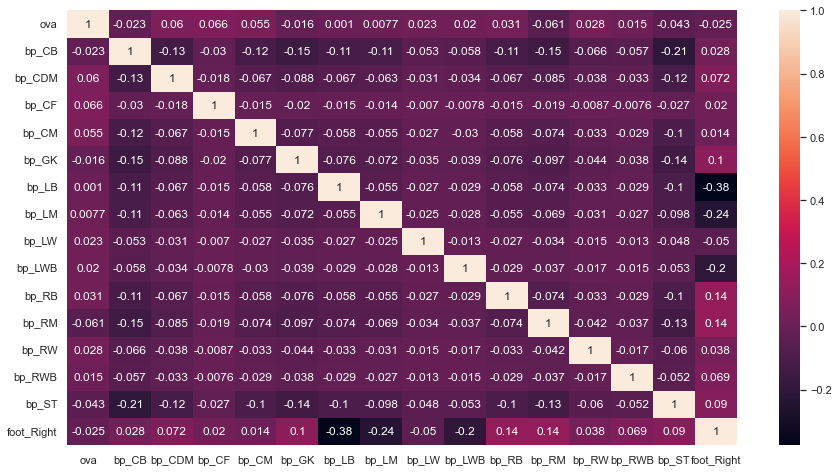

In [10]:
cat = data2.select_dtypes("object")
display(cat.head())
cat = pd.DataFrame(cat.loc[:,["bp", "foot"]])
cat = pd.get_dummies(cat, cat.columns, drop_first=True)
display(cat)
print(cat.shape)
cat2 = pd.concat([data2.loc[:, "ova"], cat], axis = 1)

corr_matrix = cat2.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_matrix, annot=True)
plt.show()



,id,age,height,weight,growth,value,wage,release clause,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,26,5.90,161,1,525000,4000,801000,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,69,51,63,63,51,60,3,58,58,58,61,62,62,62,61,63,63,63,63,63,63,63,63,59,59,59,59,59,58,54,54,54,58,15,64
1,188044,30,6.00,159,0,8500000,23000,0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,83,75,68,82,33,71,44,77,77,77,77,77,77,77,77,76,76,76,76,68,68,68,76,57,53,53,53,57,53,48,48,48,53,18,77
2,184431,33,5.40,134,0,9000000,49000,15300000,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,80,77,78,86,27,56,73,73,73,73,80,79,79,79,80,80,80,80,79,74,74,74,79,59,56,56,56,59,53,41,41,41,53,12,80
3,233796,22,5.10,152,13,275000,4000,694000,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,57,44,54,57,57,60,7,50,50,50,51,51,51,51,51,53,53,53,53,56,56,56,53,56,58,58,58,56,57,58,58,58,57,14,59
4,234799,23,5.11,150,8,725000,2000,1400000,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,66,44,60,64,60,66,4,56,56,56,59,59,59,59,59,61,61,61,62,63,63,63,62,64,64,64,64,64,63,61,61,61,63,15,65


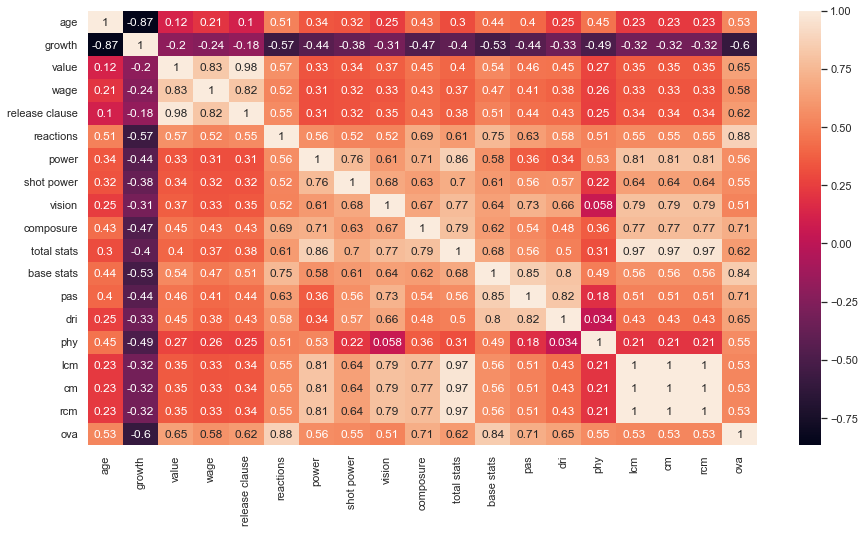

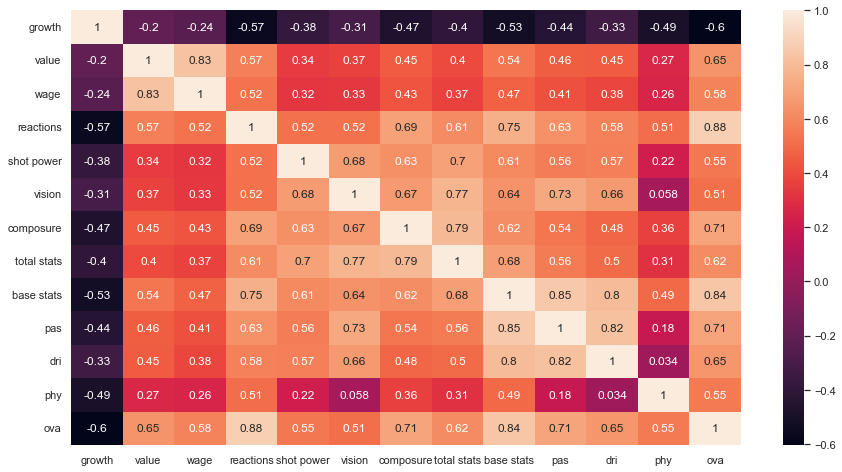

(11211, 28)

In [11]:
num = data2.select_dtypes("number")
display(num.head())

cf = 0.5
columns = []
corr_matrix = num.corr()

for col in num.columns:
        if abs(corr_matrix.loc[col,'ova']) >= cf:
            columns.append(col)
numerical_trimmed = pd.DataFrame(num, columns=columns)
corr_matrix2 = numerical_trimmed.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_matrix2, annot=True)
plt.show()

numerical_trimmed = numerical_trimmed.drop(["lcm", "cm", "rcm", "release clause", "age", "power"], axis = 1)
corr_matrix2 = numerical_trimmed.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_matrix2, annot=True)
plt.show()

### Concatenate cat and num

numerical_trimmed = pd.concat([numerical_trimmed, cat], axis = 1)
numerical_trimmed.shape


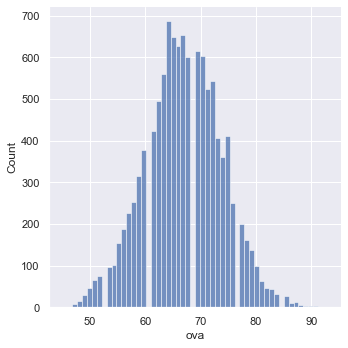

In [12]:
### OVA values follow a normal distribution, no transformation needed

sns.displot(numerical_trimmed["ova"])

In [13]:
### X,y split

y = numerical_trimmed["ova"]
x = numerical_trimmed.drop(["ova"], axis = 1)

In [14]:
### Train-test split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 80)
print(x_train.shape)
print(x_test.shape)

(8968, 27)
(2243, 27)


In [15]:
### Normaliyation by columns 

transformer = MinMaxScaler().fit(x_train)
x_train_norm = transformer.transform(x_train)
x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns)
x_train_norm

,growth,value,wage,reactions,shot power,vision,composure,total stats,base stats,pas,dri,phy,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right
0,0.04,0.100000,0.089286,0.718310,0.567901,0.690476,0.714286,0.799746,0.743191,0.701493,0.761194,0.698413,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.40,0.014444,0.012500,0.605634,0.654321,0.547619,0.535714,0.669421,0.591440,0.507463,0.611940,0.698413,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.24,0.009722,0.000893,0.577465,0.604938,0.583333,0.595238,0.568341,0.525292,0.477612,0.582090,0.634921,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.007778,0.010714,0.563380,0.827160,0.547619,0.726190,0.715194,0.688716,0.492537,0.656716,0.841270,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.20,0.222222,0.071429,0.788732,0.827160,0.702381,0.833333,0.753973,0.684825,0.626866,0.671642,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8963,0.00,0.015556,0.039286,0.647887,0.481481,0.535714,0.595238,0.607120,0.505837,0.462687,0.447761,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8964,0.68,0.022222,0.000893,0.563380,0.666667,0.547619,0.654762,0.662428,0.626459,0.552239,0.552239,0.793651,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8965,0.44,0.005278,0.005357,0.366197,0.444444,0.416667,0.428571,0.525747,0.431907,0.417910,0.432836,0.492063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8966,0.00,0.005833,0.003571,0.436620,0.395062,0.500000,0.619048,0.554355,0.455253,0.432836,0.462687,0.682540,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
transformer = MinMaxScaler().fit(x_test)
x_test_norm = transformer.transform(x_test)
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns)
x_test_norm

,growth,value,wage,reactions,shot power,vision,composure,total stats,base stats,pas,dri,phy,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right
0,0.538462,0.011905,0.001429,0.450000,0.536232,0.6250,0.684211,0.627107,0.531381,0.523810,0.612903,0.609375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.346154,0.009127,0.005714,0.466667,0.652174,0.5125,0.513158,0.442347,0.267782,0.333333,0.516129,0.593750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.115385,0.017460,0.011429,0.550000,0.681159,0.6625,0.710526,0.695887,0.619247,0.603175,0.693548,0.578125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.041270,0.057143,0.583333,0.565217,0.5625,0.763158,0.699933,0.640167,0.634921,0.645161,0.734375,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.038462,0.103175,0.034286,0.733333,0.840580,0.6750,0.710526,0.800405,0.690377,0.714286,0.709677,0.703125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,0.038462,0.014286,0.008571,0.433333,0.753623,0.7000,0.631579,0.592043,0.389121,0.682540,0.693548,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2239,0.192308,0.012302,0.008571,0.433333,0.637681,0.6875,0.605263,0.679703,0.560669,0.682540,0.645161,0.593750,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2240,0.500000,0.001746,0.005714,0.183333,0.362319,0.4500,0.447368,0.366150,0.179916,0.301587,0.435484,0.312500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2241,0.000000,0.028571,0.014286,0.683333,0.492754,0.7625,0.697368,0.658800,0.564854,0.634921,0.532258,0.703125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
### Now we apply the linear model 

lm = LinearRegression()
lm.fit(x_train_norm, y_train)
y_pred_train = lm.predict(x_train_norm)
y_pred_test = lm.predict(x_test_norm)
y_pred_train = lm.predict(x_train_norm)
y_pred_test = lm.predict(x_test_norm)
r2_train = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred_test, y_test)
mse_train = mean_squared_error(y_pred_train, y_train)
mse_test = mean_squared_error(y_pred_test, y_test)
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)
mape_train = mean_absolute_percentage_error(y_pred_train, y_train)
mape_test = mean_absolute_percentage_error(y_pred_test, y_test)

print("R2 score of trained dataset is", r2_train)
print("R2 score of test dataset is", r2_test)
print("Mean squared error of trained dataset is", mse_train)
print("Mean squared error of test dataset is", mse_test)
print("Mean absolute error of train dataset is", mae_train)
print("Mean absolute error of test dataset is", mae_test)
print("Mean absolute percentage error of train dataset is", mape_train)
print("Mean absolute percentage error of test dataset is", mape_test)
print(lm.intercept_)
print(lm.coef_)

### Which columns are more relevant? 

column_relevance = list(zip(np.abs(lm.coef_), x_train_norm.columns, lm.coef_))
column_relevance.sort(reverse=True)
column_relevance = [(item[1],item[-1],item[0]) for item in column_relevance]
column_relevance
#sorted_x = sorted(column_relevance.items(), key=lambda x: x[1])
#sorted_x


R2 score of trained dataset is 0.8972680657241169
R2 score of test dataset is 0.9070155742481638
Mean squared error of trained dataset is 4.3730492739948
Mean squared error of test dataset is 5.35027644525195
Mean absolute error of train dataset is 1.614844135412358
Mean absolute error of test dataset is 1.7428899741594284
Mean absolute percentage error of train dataset is 0.024584314562107874
Mean absolute percentage error of test dataset is 0.026225773887132944
42.40234102365132
[ -2.93768563  17.2580239    0.74734136  17.44265062   1.99062551
  -3.84105472   6.9911513  -14.33370462  13.97454844   8.4822257
  11.29303845   3.34380577   4.04439706   0.69742246   0.19383167
  -0.4073918   -4.59775521   1.58907477   0.5173821    0.80758123
   1.04109505   1.77169815   0.42026864   0.38384852   1.21611243
   0.96487233  -0.04114881]


[('reactions', 17.44265061961618, 17.44265061961618),
 ('value', 17.258023897987822, 17.258023897987822),
 ('total stats', -14.333704615336037, 14.333704615336037),
 ('base stats', 13.974548435207932, 13.974548435207932),
 ('dri', 11.293038452462909, 11.293038452462909),
 ('pas', 8.482225698075904, 8.482225698075904),
 ('composure', 6.991151298700071, 6.991151298700071),
 ('bp_GK', -4.597755209904921, 4.597755209904921),
 ('bp_CB', 4.044397062501588, 4.044397062501588),
 ('vision', -3.8410547150505376, 3.8410547150505376),
 ('phy', 3.34380577027307, 3.34380577027307),
 ('growth', -2.937685629420388, 2.937685629420388),
 ('shot power', 1.9906255135958961, 1.9906255135958961),
 ('bp_RB', 1.7716981451679423, 1.7716981451679423),
 ('bp_LB', 1.5890747669946048, 1.5890747669946048),
 ('bp_RWB', 1.2161124292799983, 1.2161124292799983),
 ('bp_LWB', 1.0410950491936697, 1.0410950491936697),
 ('bp_ST', 0.9648723300860342, 0.9648723300860342),
 ('bp_LW', 0.807581226554831, 0.807581226554831),
 ('w